Name      : Faishal Kamil<br>
Student ID: 2502001063<br>
Course    : Deep Learning<br>
Mid Exam
----

# **Import Libraries**

---



In [ ]:
import os
import random
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# **Add seed**
---
Seed digunakan untuk menghasilkan angka acak (random) yang sama setiap kali program dijalankan



In [ ]:
SEED = 42
os.environ['PYTHONHASHSEED']=str(SEED)
os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

# **Load dataset**

---



**About Dataset** <br>

**age** : age of policyholder<br>
**sex**: gender of policy holder (female=0, male=1)<br>
**bmi**: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 25<br>
**steps**: average walking steps per day of policyholder<br>
**children**: number of children / dependents of policyholder<br>
**smoker**: smoking state of policyholder (non-smoke=0;smoker=1)<br>
**region**: the residential area of policyholder in the US (northeast=0, northwest=1, southeast=2, southwest=3)<br>
**charges**: individual medical costs billed by health insurance<br>
**insuranceclaim**: yes=1, no=0<br>


In [ ]:
df=pd.read_csv('/content/insurance.csv')

# **Preprocessing data**

---
praproses data untuk menyelesaikan problem dari data tersebut



In [ ]:
 df.head()

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,3009,0,1,3,16884.92400,1
1,18,1,33.770,3008,1,0,2,1725.55230,1
2,28,1,33.000,3009,3,0,2,4449.46200,0
3,33,1,22.705,10009,0,0,1,21984.47061,0
4,32,1,28.880,8010,0,0,1,3866.85520,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   steps           1338 non-null   int64  
 4   children        1338 non-null   int64  
 5   smoker          1338 non-null   int64  
 6   region          1338 non-null   int64  
 7   charges         1338 non-null   float64
 8   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 94.2 KB


Berikutnya adalah mengecek apakah pada kolom 'age' memiliki nilai yang tidak sesuai, misalnya age dibawah 0?

In [ ]:
print(df['age'].min())
print(df['age'].max())

18
64


Setelah cek kolom 'age' yang mana data tersebut tidak ada anomali data. Berikutnya adalah mengecek apakah kolom 'sex', 'smoker', 'region', dan 'insuranceclaim' memiliki nilai diluar dari nilai yang ditetapkan pada keterangan dataset?

In [ ]:
print(df['sex'].unique()) # bernilai 0 atau 1
print(df['smoker'].unique()) # bernilai 0 atau 1
print(df['region'].unique()) # bernilai 0 atau 1 atau 2 atau 3
print(df['insuranceclaim'].unique()) # bernilai 0 atau 1

[0 1]
[1 0]
[3 2 1 0]
[1 0]


Berikutnya saya menggunakan standard scaler supaya variabel age, bmi, steps, dan charges memiliki skala yang sama. Melalui standarasasi model akan menilai dan memperhitungkan variabel dengan cara yang lebih seimbang.

In [ ]:
copy = df[['age', 'bmi', 'steps', 'charges']]
scaler = StandardScaler()
scaled = scaler.fit_transform(copy)
df[['age', 'bmi', 'steps', 'charges']] = scaled
df.head()

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
0,-1.438764,0,-0.453320,-0.945733,0,1,3,0.298584,1
1,-1.509965,1,0.509621,-0.946140,1,0,2,-0.953689,1
2,-0.797954,1,0.383307,-0.945733,3,0,2,-0.728675,0
3,-0.441948,1,-1.305531,1.908235,0,0,1,0.719843,0
4,-0.513149,1,-0.292556,1.093223,0,0,1,-0.776802,1


cek apakah class pada dataset imbalance

In [ ]:
print(df['insuranceclaim'].value_counts())

1    783
0    555
Name: insuranceclaim, dtype: int64


Ketika datanya imbalance, model akan cenderung memprediksi ke class yang lebih banyak jumlahnya dan dari hasil print diatas nilai dari insuranceclaim lebih banyak class 1 dibanding degan class 0. <br>Oleh karena itu, berikutnya saya akan melakukan oversampling supaya jumlah class 0 memiliki nilai yang sama dengan class 1. <br>  

In [ ]:
y = df['insuranceclaim']
x = df.drop('insuranceclaim', axis=1)

oversampler = RandomOverSampler(sampling_strategy='minority')
xOver, yOver = oversampler.fit_resample(x, y)

df = pd.concat([xOver, yOver], axis=1)
print(df['insuranceclaim'].value_counts())

1    783
0    783
Name: insuranceclaim, dtype: int64


Class 1 dan 0 pada kolom insuranceclaim sudah seimbang, maka kita lanjut ke step berikutnya yaitu eksplorasi data.

# **Eksplorasi dataset**

---



Step pertama pada proses eksplorasi data, saya melakukan distribusi data pada setiap kolom yang terdapat pada dataset ini.

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'steps'}>,
        <Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'smoker'}>],
       [<Axes: title={'center': 'region'}>,
        <Axes: title={'center': 'charges'}>,
        <Axes: title={'center': 'insuranceclaim'}>]], dtype=object)

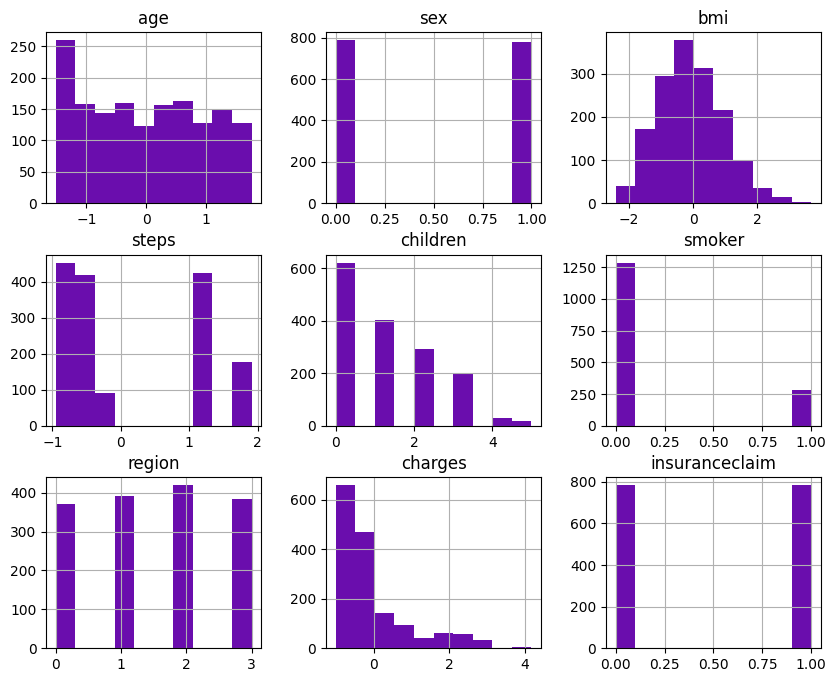

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
df.hist(figsize=(10,8), color="#6a0dad", layout=(3,3))


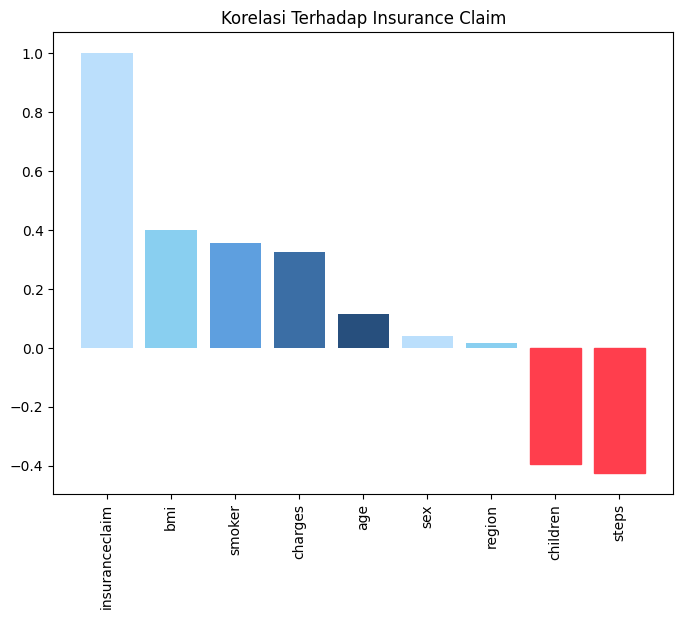

In [ ]:
correlations = df.corr()['insuranceclaim'].sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(8,6))
bars = ax.bar(correlations.index, correlations.values, color=['#BBDFFC', '#89CFF0', '#5E9FDF', '#3B6EA5', '#274F7D'])
for i, bar in enumerate(bars):
    if correlations.values[i] < 0:
        bar.set_color('#FF3E4D')
ax.tick_params(axis='x', rotation=90)
ax.set_title("Korelasi Terhadap Insurance Claim")
plt.show()


Berikutnya adalah melihat korelasi antara kolom yang lain dengan kolom insuranceclaim dan terdapat loop for untuk memeriksa nilai korelasi pada setiap bar. Jika nilai korelasi kurang dari 0, maka bar akan diubah menjadi warna merah. Hal ini dilakukan agar lebih mudah membedakan bar yang memiliki korelasi positif dan negatif.

# **Membagi dataset**

---
Memisahkan variabel dependent dan variabel independent serta membagi dataset menjadi 80% train, 10% validation, dan 10% test sesuai seperti yang ada di soal.


In [ ]:
df_target= df[['insuranceclaim']]
df_input= df[['age', 'sex', 'bmi', 'steps', 'children', 'smoker', 'region', 'charges']]

x_train, x_remain, y_train, y_remain = train_test_split(df_input, df_target, test_size=0.2, random_state=42) # random_state=42 merupakan default dari seed
x_val, x_test, y_val, y_test = train_test_split(x_remain, y_remain, test_size=0.5, random_state=42)

# **Arsitektur Awal**

---
langkah berikutnya adalah membuat arsitektur awal yang mana nantinya akan membandingkan beberapa model untuk mendapatkan nilai accurary yang terbaik


In [ ]:
n = df_input.shape[1]
num_class = 2
hidden_size = 2 * n

basemodel = tf.keras.Sequential()
basemodel.add(tf.keras.layers.Input(shape=(n,)))
basemodel.add(tf.keras.layers.Dense(hidden_size, activation='relu'))
basemodel.add(tf.keras.layers.Dense(hidden_size, activation='relu'))
basemodel.add(tf.keras.layers.Dense(num_class, activation='sigmoid'))     # menggunakan activation function jenis sigmoid
basemodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
print(basemodel.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                144       
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 2)                 34        
                                                                 
Total params: 450
Trainable params: 450
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history = basemodel.fit(x_train, y_train, epochs=50, verbose = 2)

Epoch 1/50
40/40 - 1s - loss: 0.6142 - accuracy: 0.6741 - 1s/epoch - 26ms/step
Epoch 2/50
40/40 - 0s - loss: 0.5469 - accuracy: 0.7436 - 78ms/epoch - 2ms/step
Epoch 3/50
40/40 - 0s - loss: 0.4676 - accuracy: 0.7843 - 66ms/epoch - 2ms/step
Epoch 4/50
40/40 - 0s - loss: 0.4119 - accuracy: 0.8227 - 68ms/epoch - 2ms/step
Epoch 5/50
40/40 - 0s - loss: 0.3798 - accuracy: 0.8442 - 62ms/epoch - 2ms/step
Epoch 6/50
40/40 - 0s - loss: 0.3596 - accuracy: 0.8538 - 63ms/epoch - 2ms/step
Epoch 7/50
40/40 - 0s - loss: 0.3457 - accuracy: 0.8594 - 63ms/epoch - 2ms/step
Epoch 8/50
40/40 - 0s - loss: 0.3328 - accuracy: 0.8674 - 68ms/epoch - 2ms/step
Epoch 9/50
40/40 - 0s - loss: 0.3232 - accuracy: 0.8738 - 76ms/epoch - 2ms/step
Epoch 10/50
40/40 - 0s - loss: 0.3123 - accuracy: 0.8794 - 64ms/epoch - 2ms/step
Epoch 11/50
40/40 - 0s - loss: 0.3038 - accuracy: 0.8794 - 87ms/epoch - 2ms/step
Epoch 12/50
40/40 - 0s - loss: 0.2972 - accuracy: 0.8866 - 69ms/epoch - 2ms/step
Epoch 13/50
40/40 - 0s - loss: 0.2894 

In [ ]:
y_pred = basemodel.predict(x_val)
y_pred_classes = np.argmax(y_pred, axis=1)
accuracy = accuracy_score(y_val, y_pred_classes)
print(f'Accuracy basemodel terhadap data validation: {accuracy}')

5/5 [==============================] - 0s 3ms/step
Accuracy basemodel terhadap data validation: 0.9171974522292994


# **Modifikasi Arsitektur**

---



Di sini saya akan membuat beberapa model pada modifikasi arsitektur supaya mendapatkan accuracy yang terbaik dan membuat 5 model (model A, model B, model C, model D, dan model E degan mengubah hyperparameternya (hidden size dan learning rate) dan setiap hidden layer ketiga menggunakan activation function sigmoid.

**1. Model A (hidden_size=2n, learning_rate=0.01)**

In [ ]:
hidden_size = 2 * n

modelA = tf.keras.Sequential()
modelA.add(tf.keras.layers.Input(shape=(n,)))
modelA.add(tf.keras.layers.Dense(hidden_size, activation='relu'))
modelA.add(tf.keras.layers.Dense(hidden_size, activation='relu'))
modelA.add(tf.keras.layers.Dense(num_class, activation='sigmoid'))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
modelA.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics='accuracy')
print(modelA.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 16)                144       
                                                                 
 dense_22 (Dense)            (None, 16)                272       
                                                                 
 dense_23 (Dense)            (None, 2)                 34        
                                                                 
Total params: 450
Trainable params: 450
Non-trainable params: 0
_________________________________________________________________
None


Note: <br>

```
loss='sparse_categorical_crossentropy'
```
Digunakan sebagai pengukur fungsi loss pada model yang memiliki lebih dari dua kelas. Fungsi loss ini umumnya digunakan untuk tugas klasifikasi multiclass di mana label output adalah bilangan bulat (integer), bukan dalam bentuk one-hot encoding.

In [ ]:
history = modelA.fit(x_train, y_train, epochs=50, verbose = 0)

In [ ]:
y_pred = modelA.predict(x_val)
y_pred_classes = np.argmax(y_pred, axis=1)
accuracy_A = accuracy_score(y_val, y_pred_classes)
print(f'Accuracy model A terhadap data validation: {accuracy_A}')

5/5 [==============================] - 0s 3ms/step
Accuracy model A terhadap data validation: 0.9299363057324841


**2. Model B (hidden_size=2n, learning_rate=0.1)**

In [ ]:
hidden_size = 2 * n

modelB = tf.keras.Sequential()
modelB.add(tf.keras.layers.Input(shape=(n,)))
modelB.add(tf.keras.layers.Dense(hidden_size, activation='relu'))
modelB.add(tf.keras.layers.Dense(hidden_size, activation='relu'))
modelB.add(tf.keras.layers.Dense(num_class, activation='sigmoid'))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.1)
modelB.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics='accuracy')
print(modelB.summary())

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 16)                144       
                                                                 
 dense_28 (Dense)            (None, 16)                272       
                                                                 
 dense_29 (Dense)            (None, 2)                 34        
                                                                 
Total params: 450
Trainable params: 450
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history = modelB.fit(x_train, y_train, epochs=50, verbose = 0)

In [ ]:
y_pred = modelB.predict(x_val)
y_pred_classes = np.argmax(y_pred, axis=1)
accuracy_B = accuracy_score(y_val, y_pred_classes)
print(f'Accuracy model B terhadap data validation: {accuracy_B}')

5/5 [==============================] - 0s 3ms/step
Accuracy model B terhadap data validation: 0.8535031847133758


**3. Model C (hidden_size=3n, learning_rate=0.01)**


In [ ]:
hidden_size = 3 * n

modelC = tf.keras.Sequential()
modelC.add(tf.keras.layers.Input(shape=(n,)))
modelC.add(tf.keras.layers.Dense(hidden_size, activation='relu'))
modelC.add(tf.keras.layers.Dense(hidden_size, activation='relu'))
modelC.add(tf.keras.layers.Dense(num_class, activation='sigmoid'))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
modelC.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics='accuracy')
print(modelC.summary())

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 24)                216       
                                                                 
 dense_31 (Dense)            (None, 24)                600       
                                                                 
 dense_32 (Dense)            (None, 2)                 50        
                                                                 
Total params: 866
Trainable params: 866
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history = modelC.fit(x_train, y_train, epochs=50, verbose = 0)

In [ ]:
y_pred = modelC.predict(x_val)
y_pred_classes = np.argmax(y_pred, axis=1)
accuracy_C = accuracy_score(y_val, y_pred_classes)
print(f'Accuracy model C terhadap data validation: {accuracy_C}')

5/5 [==============================] - 0s 2ms/step
Accuracy model C terhadap data validation: 0.9044585987261147


**4. Model D (hidden_size=4n, learning_rate=0.01)**

In [ ]:
hidden_size = 4 * n

modelD = tf.keras.Sequential()
modelD.add(tf.keras.layers.Input(shape=(n,)))
modelD.add(tf.keras.layers.Dense(hidden_size, activation='relu'))
modelD.add(tf.keras.layers.Dense(hidden_size, activation='relu'))
modelD.add(tf.keras.layers.Dense(num_class, activation='sigmoid'))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
modelD.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics='accuracy')
print(modelD.summary())

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 32)                288       
                                                                 
 dense_34 (Dense)            (None, 32)                1056      
                                                                 
 dense_35 (Dense)            (None, 2)                 66        
                                                                 
Total params: 1,410
Trainable params: 1,410
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history = modelD.fit(x_train, y_train, epochs=50, verbose = 0)

In [ ]:
y_pred = modelD.predict(x_val)
y_pred_classes = np.argmax(y_pred, axis=1)
accuracy_D = accuracy_score(y_val, y_pred_classes)
print(f'Accuracy model D terhadap data validation: {accuracy_D}')

5/5 [==============================] - 0s 3ms/step
Accuracy model D terhadap data validation: 0.9426751592356688


**5. Model E (hidden_size=5n, learning_rate=0.01)**


In [ ]:
hidden_size = 5 * n

modelE = tf.keras.Sequential()
modelE.add(tf.keras.layers.Input(shape=(n,)))
modelE.add(tf.keras.layers.Dense(hidden_size, activation='relu'))
modelE.add(tf.keras.layers.Dense(hidden_size, activation='relu'))
modelE.add(tf.keras.layers.Dense(num_class, activation='sigmoid'))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
modelE.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics='accuracy')
print(modelE.summary())

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 40)                360       
                                                                 
 dense_37 (Dense)            (None, 40)                1640      
                                                                 
 dense_38 (Dense)            (None, 2)                 82        
                                                                 
Total params: 2,082
Trainable params: 2,082
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history = modelE.fit(x_train, y_train, epochs=50, verbose = 0)

In [ ]:
y_pred = modelE.predict(x_val)
y_pred_classes = np.argmax(y_pred, axis=1)
accuracy_E = accuracy_score(y_val, y_pred_classes)
print(f'Accuracy model E terhadap data validation: {accuracy_E}')

5/5 [==============================] - 0s 4ms/step
Accuracy model E terhadap data validation: 0.9044585987261147


In [ ]:
print(f'Accuracy model A terhadap data validation: {accuracy_A}')
print(f'Accuracy model B terhadap data validation: {accuracy_B}')
print(f'Accuracy model C terhadap data validation: {accuracy_C}')
print(f'Accuracy model D terhadap data validation: {accuracy_D}')
print(f'Accuracy model E terhadap data validation: {accuracy_E}')

Accuracy model A terhadap data validation: 0.9299363057324841
Accuracy model B terhadap data validation: 0.8535031847133758
Accuracy model C terhadap data validation: 0.9044585987261147
Accuracy model D terhadap data validation: 0.9426751592356688
Accuracy model E terhadap data validation: 0.9044585987261147


**Choose model D as the first best_model**

In [ ]:
best_model1 = modelD

**Setelah mendapatkan model D sebagai best model, maka berikutnya mencari best model ke- 2 sebagai perbandingan model menggunakan nested loop**

In [ ]:
from sklearn.metrics import accuracy_score
#pada param_grid, saya akan mencoba dengan mengubah hyperparameter hidden size dan learning rate mana yang menghasilkan accuracy terbaik
param_grid = {'hidden_size': [2*n, 3*n, 4*n, 5*n],
              'learning_rate': [0.001, 0.01, 0.1]}

def create_model(hidden_size, learning_rate):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Input(shape=(n,)))
    model.add(tf.keras.layers.Dense(hidden_size, activation='relu'))
    model.add(tf.keras.layers.Dense(hidden_size, activation='relu'))
    model.add(tf.keras.layers.Dense(num_class, activation='sigmoid')) # saya menggunakan activation sigmoid
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics='accuracy')
    return model

best_accuracy = 0
best_hidden_size = 0
best_learning_rate = 0
best_model2 = 0
for hidden_size in param_grid['hidden_size']:
    for learning_rate in param_grid['learning_rate']:
        SEED = 42                                       #sisipkan seed
        os.environ['PYTHONHASHSEED']=str(SEED)
        os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
        random.seed(SEED)
        np.random.seed(SEED)
        tf.random.set_seed(SEED)

        model = create_model(hidden_size=hidden_size, learning_rate=learning_rate)
        model.fit(x_train, y_train, epochs=50, verbose=0)
        y_pred = model.predict(x_val)
        y_pred_classes = np.argmax(y_pred, axis=1)
        accuracy = accuracy_score(y_val, y_pred_classes)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_hidden_size = hidden_size
            best_learning_rate = learning_rate
            best_model2 = model

print(f'\nBest Hyperparameters: hidden_size={best_hidden_size}, learning_rate={best_learning_rate}, accuracy={best_accuracy}')

5/5 [==============================] - 0s 3ms/step

Best Hyperparameters: hidden_size=40, learning_rate=0.01, accuracy=0.9426751592356688


Sehingga diketahui dengan code di atas, bahwa best hyperparameternya adalah dengan hidden size=40 dan learning rate=0.01

# **Classification Report**

---



**- Base Model**

In [ ]:
y_pred = basemodel.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print('Classification Report basemodel terhadap data test:')
print(classification_report(y_test, y_pred_classes))

5/5 [==============================] - 0s 3ms/step
Classification Report basemodel terhadap data test:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90        76
           1       0.95      0.85      0.90        81

    accuracy                           0.90       157
   macro avg       0.90      0.90      0.90       157
weighted avg       0.90      0.90      0.90       157



**- Best Model 1 (Model D)**

In [ ]:
y_pred = best_model1.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print('Classification Report best_model 1 terhadap data test:')
print(classification_report(y_test, y_pred_classes))

5/5 [==============================] - 0s 3ms/step
Classification Report best_model 1 terhadap data test:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        76
           1       0.97      0.91      0.94        81

    accuracy                           0.94       157
   macro avg       0.94      0.94      0.94       157
weighted avg       0.94      0.94      0.94       157



**- Best Model 2 (using nested loop)**

In [ ]:
y_pred = best_model2.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print('Classification Report best model 2 terhadap data test:')
print(classification_report(y_test, y_pred_classes))

5/5 [==============================] - 0s 3ms/step
Classification Report best model 2 terhadap data test:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        76
           1       0.97      0.96      0.97        81

    accuracy                           0.97       157
   macro avg       0.97      0.97      0.97       157
weighted avg       0.97      0.97      0.97       157

